<a href="https://colab.research.google.com/github/satya0212/ML-project-for-predicting-Extrovert-and-Introvert/blob/main/introvert_and_extrovert_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score


# Let's take a look to our data


In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


## let's see some basic information about data

In [4]:
data.shape

(18524, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
data.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


converting categorical values to numerical values

In [7]:
new_data=data.replace({'Stage_fear':{'No':0,'Yes':1},'Drained_after_socializing':{'No':0,'Yes':1},'Personality':{'Extrovert':1,'Introvert':0}})

/tmp/ipython-input-2449997737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data=data.replace({'Stage_fear':{'No':0,'Yes':1},'Drained_after_socializing':{'No':0,'Yes':1},'Personality':{'Extrovert':1,'Introvert':0}})


In [8]:
new_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,1
18520,18520,1.0,NaN,6.0,7.0,0.0,6.0,5.0,1
18521,18521,7.0,1.0,1.0,1.0,1.0,1.0,NaN,0
18522,18522,NaN,1.0,1.0,0.0,1.0,5.0,2.0,0


In [9]:
new_data.shape

(18524, 9)

In [10]:
new_data['Stage_fear'].value_counts()

,count
Stage_fear,
0.0,12609
1.0,4022


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  float64
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  float64
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


handling missing values

In [13]:
new_data = new_data.fillna({
    'Time_spent_Alone': new_data['Time_spent_Alone'].mean(),
    'Stage_fear': new_data['Stage_fear'].mode()[0] if not new_data['Stage_fear'].mode().empty else None,
    'Social_event_attendance': new_data['Social_event_attendance'].mean(),
    'Going_outside': new_data['Going_outside'].mean(),
    'Drained_after_socializing': new_data['Drained_after_socializing'].mode()[0] if not new_data['Drained_after_socializing'].mode().empty else None,
    'Friends_circle_size': new_data['Friends_circle_size'].mean(),
    'Post_frequency': new_data['Post_frequency'].mean()
})

In [14]:
new_data.isnull().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [15]:
new_data.shape

(18524, 9)

In [16]:
new_data['Personality'].value_counts()

,count
Personality,
1,13699
0,4825


some statistical measures of data

In [17]:
new_data.describe()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,9261.500000,3.137764,0.217124,5.265106,4.044319,0.219283,7.996737,4.982097,0.739527
std,5347.562529,2.905696,0.412299,2.664215,1.979276,0.413772,4.101561,2.779168,0.438905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000
50%,9261.500000,3.000000,0.000000,5.265106,4.000000,0.000000,8.000000,5.000000,1.000000
75%,13892.250000,4.000000,0.000000,7.000000,6.000000,0.000000,11.000000,7.000000,1.000000
max,18523.000000,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [18]:
group_means=new_data.groupby('Personality').mean()

In [19]:
group_means

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
Personality,,,,,,,,
0,9274.786736,6.823982,0.784663,2.243475,1.796339,0.792953,3.611160,1.951561
1,9256.820206,1.839421,0.017228,6.329371,4.836093,0.017228,9.541406,6.049499


# data visualisation

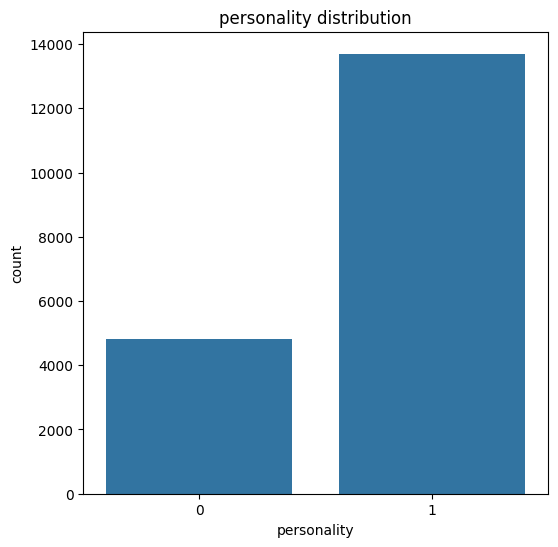

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='Personality',data=new_data)
plt.title('personality distribution')
plt.xlabel('personality')
plt.ylabel('count')
plt.show()

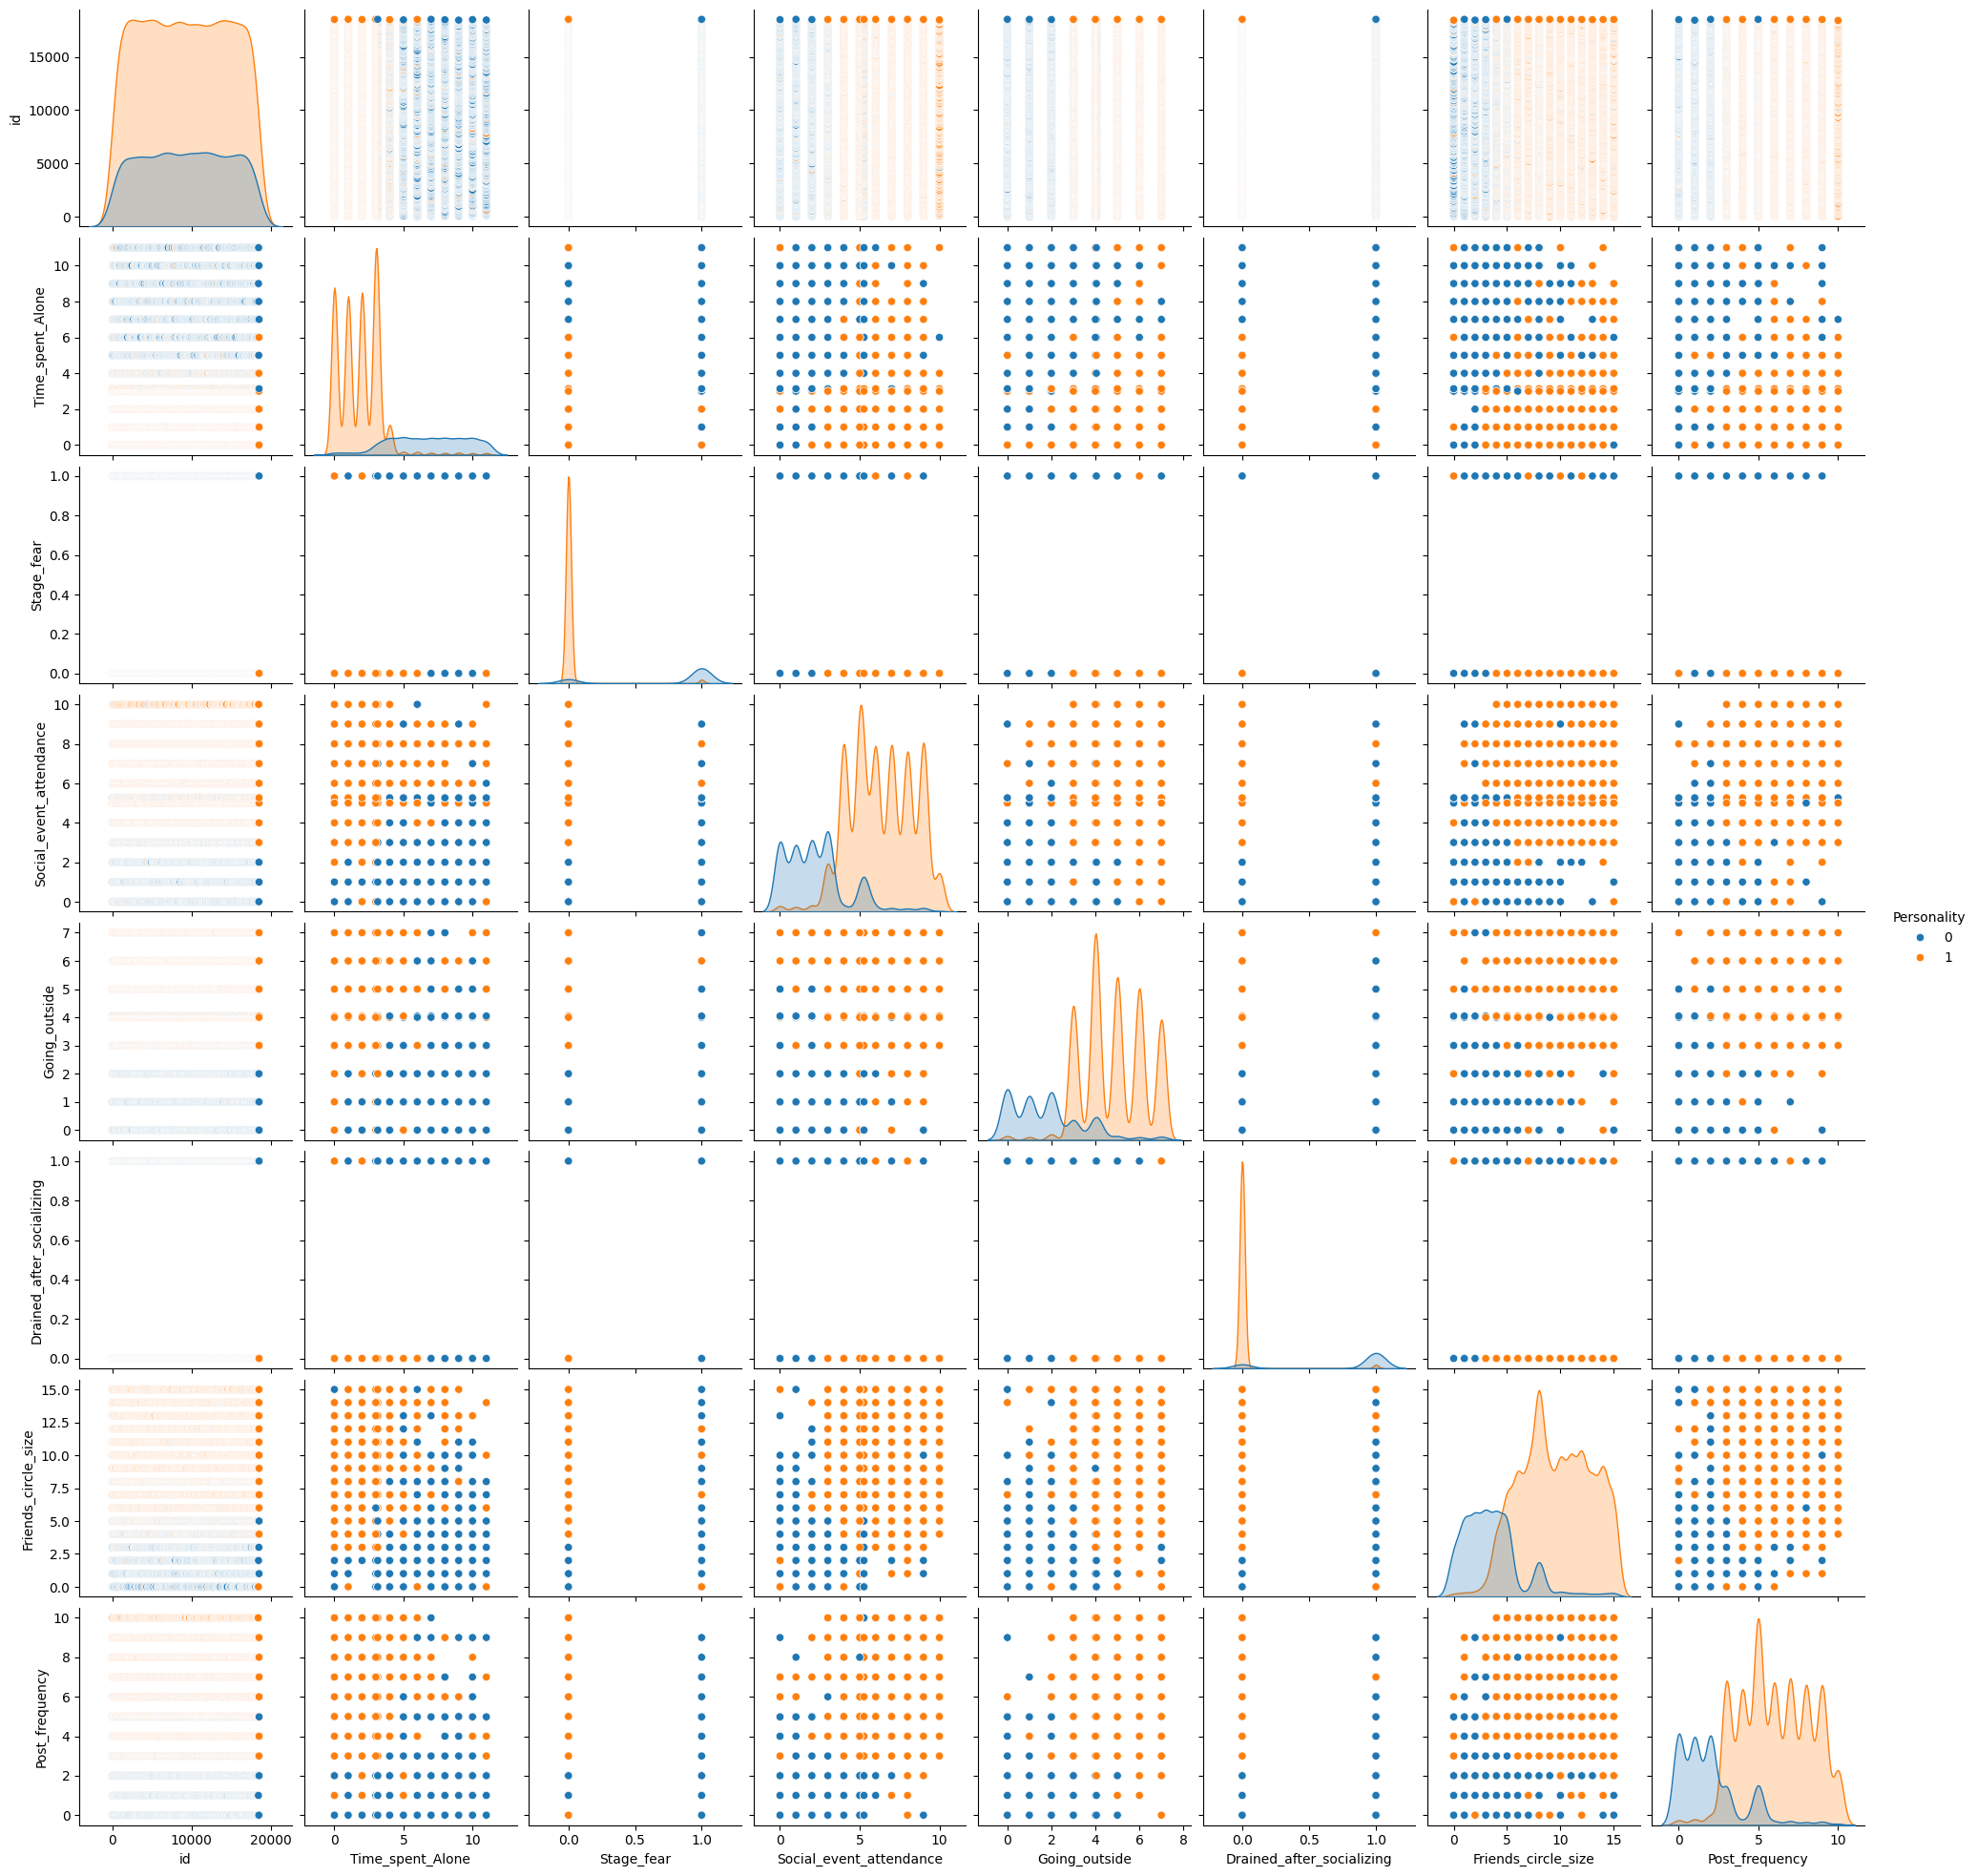

In [48]:
sns.pairplot(new_data,hue='Personality')
plt.show()

In [21]:
correlation=new_data.corr()

In [22]:
correlation

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,1.000000,-0.000004,-0.000449,0.002656,0.004282,0.000214,0.004210,-0.001880,-0.001475
Time_spent_Alone,-0.000004,1.000000,0.717709,-0.584338,-0.590467,0.720775,-0.559073,-0.566516,-0.752916
Stage_fear,-0.000449,0.717709,1.000000,-0.642719,-0.640232,0.775335,-0.610209,-0.610634,-0.816959
Social_event_attendance,0.002656,-0.584338,-0.642719,1.000000,0.537373,-0.644999,0.529440,0.521939,0.673113
Going_outside,0.004282,-0.590467,-0.640232,0.537373,1.000000,-0.644850,0.507860,0.528782,0.674065
Drained_after_socializing,0.000214,0.720775,0.775335,-0.644999,-0.644850,1.000000,-0.613982,-0.616030,-0.822843
Friends_circle_size,0.004210,-0.559073,-0.610209,0.529440,0.507860,-0.613982,1.000000,0.484895,0.634590
Post_frequency,-0.001880,-0.566516,-0.610634,0.521939,0.528782,-0.616030,0.484895,1.000000,0.647173
Personality,-0.001475,-0.752916,-0.816959,0.673113,0.674065,-0.822843,0.634590,0.647173,1.000000


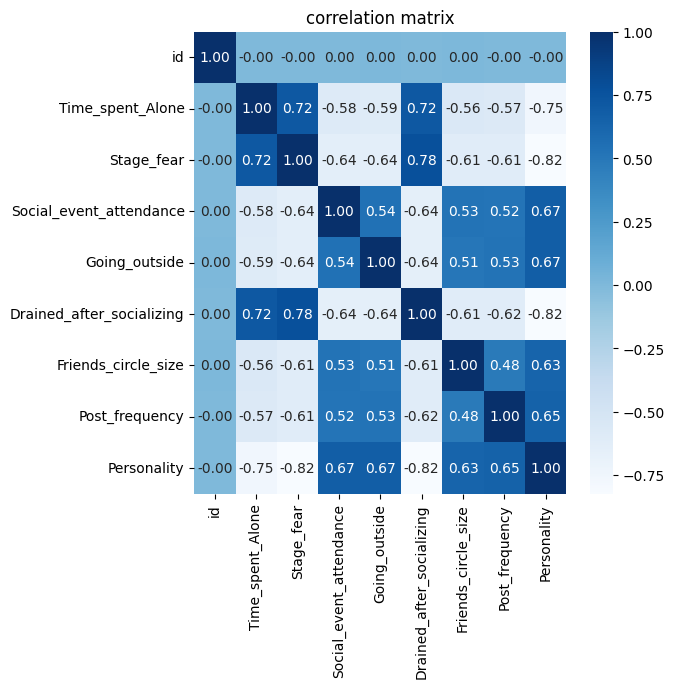

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,annot=True,cmap='Blues',fmt='.2f')
plt.title('correlation matrix')
plt.show()

# predictive model

separating training data

In [24]:
x=new_data.drop(columns=['id','Personality'],axis=1)
y=new_data['Personality']

In [25]:
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.000000,0.0,6.0,4.0,0.0,15.0,5.000000
1,1.000000,0.0,7.0,3.0,0.0,10.0,8.000000
2,6.000000,1.0,1.0,0.0,0.0,3.0,0.000000
3,3.000000,0.0,7.0,3.0,0.0,11.0,5.000000
4,1.000000,0.0,4.0,4.0,0.0,13.0,4.982097
...,...,...,...,...,...,...,...
18519,3.000000,0.0,7.0,3.0,0.0,9.0,7.000000
18520,1.000000,0.0,6.0,7.0,0.0,6.0,5.000000
18521,7.000000,1.0,1.0,1.0,1.0,1.0,4.982097
18522,3.137764,1.0,1.0,0.0,1.0,5.0,2.000000


In [26]:
y

,Personality
0,1
1,1
2,0
3,1
4,1
...,...
18519,1
18520,1
18521,0
18522,0


spliting the data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(18524, 7) (14819, 7) (3705, 7)


# model efficiencies

In [28]:
models=({
    'LogisticRegression':LogisticRegression(),
    'DecisionTReeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier(),
    'SVM':svm.SVC(kernel='linear'),
    'gaussianNB':GaussianNB()


})

In [29]:
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f'{name}:accuracy={accuracy:.4f}')

LogisticRegression:accuracy=0.9703
DecisionTReeClassifier:accuracy=0.9336
RandomForestClassifier:accuracy=0.9690
XGBClassifier:accuracy=0.9682
SVM:accuracy=0.9692
gaussianNB:accuracy=0.9703


# Logistic Regression is giving best resut with an accuracy score of 97.03%

In [30]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# submission

In [31]:
test=pd.read_csv('/content/test.csv')

In [32]:
test.head()



,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [33]:
test.shape

(6175, 8)

In [34]:
test_new=test.replace({'Stage_fear':{'No':0,'Yes':1},'Drained_after_socializing':{'No':0,'Yes':1},'Personality':{'Extrovert':1,'Introvert':0}})

/tmp/ipython-input-2656185741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_new=test.replace({'Stage_fear':{'No':0,'Yes':1},'Drained_after_socializing':{'No':0,'Yes':1},'Personality':{'Extrovert':1,'Introvert':0}})


In [35]:
test_new.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,18525,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,18526,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,18527,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,18528,9.0,1.0,1.0,2.0,1.0,1.0,1.0


In [36]:
test_new =test_new.fillna({
    'Time_spent_Alone': new_data['Time_spent_Alone'].mean(),
    'Stage_fear': new_data['Stage_fear'].mode()[0] if not new_data['Stage_fear'].mode().empty else None,
    'Social_event_attendance': new_data['Social_event_attendance'].mean(),
    'Going_outside': new_data['Going_outside'].mean(),
    'Drained_after_socializing': new_data['Drained_after_socializing'].mode()[0] if not new_data['Drained_after_socializing'].mode().empty else None,
    'Friends_circle_size': new_data['Friends_circle_size'].mean(),
    'Post_frequency': new_data['Post_frequency'].mean()
})

In [38]:
test_new.isnull().sum()

,0
id,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0


In [39]:
test_new

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.000000,0.0,7.0,4.0,0.0,6.0,4.982097
1,18525,3.137764,1.0,0.0,0.0,1.0,5.0,1.000000
2,18526,3.000000,0.0,5.0,6.0,0.0,15.0,9.000000
3,18527,3.000000,0.0,4.0,4.0,0.0,5.0,6.000000
4,18528,9.000000,1.0,1.0,2.0,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...
6170,24694,3.000000,0.0,5.0,5.0,0.0,9.0,6.000000
6171,24695,8.000000,1.0,2.0,1.0,1.0,0.0,0.000000
6172,24696,2.000000,0.0,4.0,3.0,0.0,9.0,7.000000
6173,24697,3.000000,0.0,4.0,4.0,0.0,11.0,9.000000


In [46]:
input_data=(3.0,0,4.0,4.0,1,5.0,6.0) # Removed 'id' from input data
input_data_as_numpy_array=np.asarray(input_data)

# Reshape the array to be a 2D array with one row and 7 columns (number of features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
  print('extrovert')
else:
  print('introvert')


[1]
extrovert


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
